In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import mannwhitneyu

In [44]:
# Step 2: Read CSV File
data = pd.read_csv("Data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Columns: 294 entries, RECNO to zinc
dtypes: float64(264), int64(12), object(18)
memory usage: 55.2+ KB


In [45]:
data

,RECNO,PFS_3,PFS_6,BCODEID,PROCDATE,STARTED,FINISHED,TIME,SRVID,Protocol,...,vitd,vitd_iu,vitd2,vitd3,vite_iu,vitk,water,wgrain,xylitol,zinc
0,1,1,1,146102-101-029,11/16/2023,11/16/2023,11/16/2023,27,107828,Dr. Zhang microbiome Project,...,7.317863,292.714519,0.000000,7.317863,19.750822,339.253815,4509.670410,2.104521,0.021781,15.960163
1,2,1,1,146102-101-045,11/16/2023,10/12/2023,10/12/2023,205,106484,Dr. Zhang microbiome Project,...,5.625398,225.015926,0.000740,5.624686,14.068545,319.888824,2240.737061,1.418438,0.032384,8.326053
2,3,0,0,146102-101-044,11/16/2023,10/5/2023,10/5/2023,51,106209,Dr. Zhang microbiome Project,...,16.038822,641.552887,0.005726,16.033068,96.452835,193.767380,4155.129883,3.296904,0.023123,36.078709
3,4,1,1,146102-101-042,11/16/2023,8/24/2023,8/24/2023,58,103257,Dr. Zhang microbiome Project,...,3.134055,125.362186,0.000411,3.133671,6.663453,61.956299,2409.795654,0.583589,0.007616,5.715151
4,5,1,1,146102-101-041,11/16/2023,8/24/2023,8/24/2023,75,101919,Dr. Zhang microbiome Project,...,2.993014,119.720554,0.004493,2.988521,9.606547,76.282768,3885.890381,0.940027,0.011973,7.166302
5,6,0,0,146102-101-040,11/16/2023,7/20/2023,7/20/2023,63,101718,Dr. Zhang microbiome Project,...,4.351616,174.064655,0.010575,4.341042,11.781340,162.734863,2016.755493,1.470055,0.011507,13.470440
6,7,1,0,146102-101-033,11/16/2023,8/24/2022,8/24/2022,47,92318,Dr. Zhang microbiome Project,...,18.173561,726.942444,0.000767,18.172796,40.758492,504.115753,5701.455566,4.120877,0.042575,22.789619
7,8,0,0,146102-101-032,11/16/2023,8/5/2022,8/23/2022,25910,91670,Dr. Zhang microbiome Project,...,2.237699,89.507952,0.000192,2.237535,5.308932,21.282604,1132.744751,0.115260,0.003616,4.048821
8,9,1,0,146102-101-031,11/16/2023,7/20/2022,7/20/2022,44,91369,Dr. Zhang microbiome Project,...,1.610630,64.425206,0.000274,1.610356,5.696411,54.599945,1913.152588,0.037808,0.002466,3.114055
9,10,1,1,146102-101-027,11/16/2023,4/18/2022,4/18/2022,127,89081,Dr. Zhang microbiome Project,...,10.215205,408.608208,0.001644,10.213644,13.340355,320.162811,4631.609863,1.264575,0.040630,10.417588


In [46]:
# Step 4: Split Data
X = data[['alcohol']]
y = data['PFS_6']  # Target variable
X

,alcohol
0,0.000000
1,23.236631
2,0.000521
3,0.915808
4,0.000000
5,0.006356
6,0.069726
7,0.012384
8,0.011397
9,16.439013


In [47]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Evaluate Model
y_pred = rf_model.predict(X_test)

# Step 8: Report Results
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [48]:
# Step 4: Split Data
X = data[['addsugar']]
y = data['PFS_6']  # Target variable
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Evaluate Model
y_pred = rf_model.predict(X_test)

# Step 8: Report Results
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



alcohol

In [49]:
# Separate data into two groups based on PFS value (0 and 1)
pfs_0 = data[data['PFS_6'] == 0]['alcohol']
pfs_1 = data[data['PFS_6'] == 1]['alcohol']

pfs_0


2      0.000521
5      0.006356
6      0.069726
7      0.012384
8      0.011397
11     0.000712
14     0.038685
17     0.040548
20     0.000000
21    23.781534
Name: alcohol, dtype: float64

In [50]:
pfs_1

0      0.000000
1     23.236631
3      0.915808
4      0.000000
9     16.439013
10     3.078986
12     0.000000
13     0.823507
15     0.102164
16     0.010959
18    54.430470
19     3.518685
22    33.330822
23     3.655890
Name: alcohol, dtype: float64

In [51]:
# Perform t-test
t_statistic, p_value = ttest_ind(pfs_0, pfs_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -1.3497652076913176
p-value: 0.19081722820718738


In [52]:
ala_0 = data[data['PFS_6'] == 0]['alanine']
ala_1 = data[data['PFS_6'] == 1]['alanine']

# Perform t-test
t_statistic, p_value = ttest_ind(ala_0, ala_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.9861664516676912
p-value: 0.3347738713259173


In [53]:
ace_0 = data[data['PFS_6'] == 0]['acesupot']
ace_1 = data[data['PFS_6'] == 1]['acesupot']

# Perform t-test
t_statistic, p_value = ttest_ind(ace_0, ace_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.7287053744061905
p-value: 0.4738683095702483


In [54]:
ace_0 = data[data['PFS_6'] == 0]['adsugtot']
ace_1 = data[data['PFS_6'] == 1]['adsugtot']

# Perform t-test
t_statistic, p_value = ttest_ind(ace_0, ace_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -0.5365612705565524
p-value: 0.5969554046185446


In [55]:
aspartam_0 = data[data['PFS_6'] == 0]['aspartam']
aspartam_1 = data[data['PFS_6'] == 1]['aspartam']

# Perform t-test
t_statistic, p_value = ttest_ind(aspartam_0, aspartam_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.19452525836281317
p-value: 0.8475497480074754


In [56]:
ash_0 = data[data['PFS_6'] == 0]['ash']
ash_1 = data[data['PFS_6'] == 1]['ash']

# Perform t-test
t_statistic, p_value = ttest_ind(ash_0, ash_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.6059561241807784
p-value: 0.5507453098245457


In [57]:
alphtoce_0 = data[data['PFS_6'] == 0]['alphtoce']
alphtoce_1 = data[data['PFS_6'] == 1]['alphtoce']

# Perform t-test
t_statistic, p_value = ttest_ind(alphtoce_0, alphtoce_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.3142364671142486
p-value: 0.20230518690884877


In [58]:
alphtoco_0 = data[data['PFS_6'] == 0]['alphtoco']
alphtoco_1 = data[data['PFS_6'] == 1]['alphtoco']

# Perform t-test
t_statistic, p_value = ttest_ind(alphtoco_0, alphtoco_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.1770495260939922
p-value: 0.251753852915809


In [59]:
arginine_0 = data[data['PFS_6'] == 0]['arginine']
arginine_1 = data[data['PFS_6'] == 1]['arginine']

# Perform t-test
t_statistic, p_value = ttest_ind(arginine_0, arginine_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.9441359549839047
p-value: 0.3553543483872631


In [60]:
aspartam_0 = data[data['PFS_6'] == 0]['aspartam']
aspartam_1 = data[data['PFS_6'] == 1]['aspartam']

# Perform t-test
t_statistic, p_value = ttest_ind(aspartam_0, aspartam_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.19452525836281317
p-value: 0.8475497480074754


In [61]:
aspartic_0 = data[data['PFS_6'] == 0]['aspartic']
aspartic_1 = data[data['PFS_6'] == 1]['aspartic']

# Perform t-test
t_statistic, p_value = ttest_ind(aspartic_0, aspartic_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.0697350954333154
p-value: 0.2963354421844253


In [62]:
avcarb_0 = data[data['PFS_6'] == 0]['avcarb']
avcarb_1 = data[data['PFS_6'] == 1]['avcarb']

# Perform t-test
t_statistic, p_value = ttest_ind(avcarb_0, avcarb_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.4153656741486187
p-value: 0.6818974377614881


In [63]:
avcarb_0 = data[data['PFS_6'] == 0]['avcarb']
avcarb_1 = data[data['PFS_6'] == 1]['avcarb']

# Perform t-test
t_statistic, p_value = ttest_ind(avcarb_0, avcarb_1)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.4153656741486187
p-value: 0.6818974377614881


In [64]:
avcarb_0_3 = data[data['PFS_3'] == 0]['avcarb']
avcarb_1_3 = data[data['PFS_3'] == 1]['avcarb']

# Perform t-test
t_statistic, p_value = ttest_ind(avcarb_0_3, avcarb_1_3)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.3074215578301061
p-value: 0.7614138460556776


In [65]:
def compute_ttest_pvalues(data, group_column):
    """
    Compute t-test p-values for each numeric column in data, comparing values
    based on the group_column.

    Parameters:
    - data: DataFrame containing the data
    - group_column: Column name used for grouping (e.g., 'PFS')
    - value_column: Column name containing numeric values to test (e.g., 'alanine')

    Returns:
    - DataFrame with columns 'feature', 't-statistic', 'p-value' 
      containing the results of t-tests for each numeric column
    """
    results = []

    # Iterate over each numeric column in the DataFrame
    for column in data.select_dtypes(include=[np.number]).columns:
      # print(column)
    #     if column != group_column and column != value_column:
        ala_0 = data[data[group_column] == 0][column]
        ala_1 = data[data[group_column] == 1][column]

            # Perform t-test
        u_statistic, p_value = mannwhitneyu(ala_0, ala_1)

            # Append results to the list
        results.append({'feature': column,
                            'u-statistic': u_statistic,
                            'p-value': p_value})

    # Create a DataFrame from the results list
    results_df = pd.DataFrame(results)

    return results_df


In [66]:
group_column = 'PFS_6'
p_values_df = compute_ttest_pvalues(data, group_column)
p_values_df.to_csv("PFS_6.csv", index=False)
print(p_values_df)

     feature  u-statistic   p-value
0      RECNO         66.0  0.837620
1      PFS_3         28.0  0.001207
2      PFS_6          0.0  0.000002
3       TIME         47.0  0.187395
4      SRVID         74.0  0.837620
..       ...          ...       ...
271     vitk         63.0  0.703499
272    water         45.0  0.151409
273   wgrain         72.0  0.930011
274  xylitol         61.0  0.618689
275     zinc         71.0  0.976644

[276 rows x 3 columns]


In [67]:
group_column = 'PFS_3'
p_values_df = compute_ttest_pvalues(data, group_column)
p_values_df.to_csv("PFS_3.csv", index=False)
print(p_values_df)

     feature  u-statistic   p-value
0      RECNO         51.0  0.871170
1      PFS_3          0.0  0.000002
2      PFS_6         12.0  0.001207
3       TIME         55.5  0.946812
4      SRVID         57.0  0.871170
..       ...          ...       ...
271     vitk         47.0  0.672917
272    water         32.0  0.155636
273   wgrain         55.0  0.974100
274  xylitol         38.0  0.310440
275     zinc         61.0  0.672917

[276 rows x 3 columns]


In [68]:
# Step 2: Read CSV File
data_f = pd.read_csv("Data_filtered.csv")

data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Columns: 294 entries, RECNO to zinc
dtypes: float64(264), int64(12), object(18)
memory usage: 53.0+ KB


In [69]:
group_column = 'PFS_6'
p_values_df = compute_ttest_pvalues(data_f, group_column)
p_values_df.to_csv("PFS_6_f.csv", index=False)
group_column = 'PFS_3'
p_values_df = compute_ttest_pvalues(data_f, group_column)
p_values_df.to_csv("PFS_3_f.csv", index=False)

In [70]:
pfs1 = data_f[data_f['PFS_3'] == 1][['glycine', 'serine']]
pfs0 = data_f[data_f['PFS_3'] == 0][['glycine', 'serine']]

In [71]:


f_stat, p_val = stats.f_oneway(pfs1, pfs0)
print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: [2.66617794 2.24970453]
p-value: [0.11740705 0.14852493]


In [72]:
pfs1 = data_f[data_f['PFS_6'] == 1][['glycine', 'serine']]
pfs1

,glycine,serine
0,3.542630,4.985178
1,2.241452,2.503151
3,1.710465,2.029507
4,1.548986,2.874110
9,3.839343,3.821096
10,4.391369,4.710850
12,3.167616,3.255479
13,4.414603,4.130822
15,1.108877,1.496849
16,0.853808,1.032658


In [73]:
pfs0 = data_f[data_f['PFS_6'] == 0][['glycine', 'serine']]
pfs0

,glycine,serine
2,10.655315,11.214330
5,4.389753,5.099973
6,4.893424,7.045863
7,0.908521,1.137096
8,0.893205,1.290740
11,1.592658,1.797507
14,2.556931,2.639781
19,3.033671,3.250685
20,3.380438,3.752603


In [74]:
f_stat, p_val = stats.f_oneway(pfs0, pfs1)
p_val

array([0.34906098, 0.26568486])

In [75]:

import statsmodels.api as sm

data_f['Intercept'] = 1


model = sm.OLS(data_f['PFS_3'], data_f[['Intercept', 'glycine', 'serine']])


results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PFS_3   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.306
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.293
Time:                        21:26:41   Log-Likelihood:                -10.855
No. Observations:                  23   AIC:                             27.71
Df Residuals:                      20   BIC:                             31.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9746      0.163      5.965      0.0

In [76]:
data_f['Intercept'] = 1


model = sm.OLS(data_f['PFS_6'], data_f[['Intercept', 'glycine', 'serine']])


results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PFS_6   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.7779
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.473
Time:                        21:26:42   Log-Likelihood:                -15.275
No. Observations:                  23   AIC:                             36.55
Df Residuals:                      20   BIC:                             39.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8071      0.198      4.076      0.0

In [77]:
# Step 2: Filter avcarb values based on PFS_3
daidzein_0_6 = data[data['PFS_6'] == 0]['daidzein']
daidzein_1_6 = data[data['PFS_6'] == 1]['daidzein']

Text(0.5, 1.0, 'daidzein')

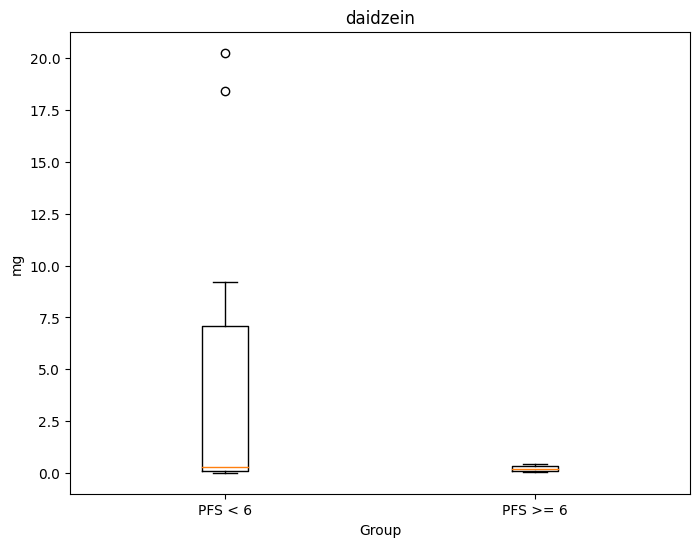

In [78]:
import matplotlib.pyplot as plt
# Step 3: Plotting the boxplot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Create a boxplot
plt.boxplot([daidzein_0_6, daidzein_1_6], labels=['PFS < 6', 'PFS >= 6'])

# Set labels and title
plt.xlabel('Group')
plt.ylabel('mg')
plt.title('daidzein')

In [79]:
# Step 2: Filter avcarb values based on PFS_3
serine_0_6 = data[data['PFS_6'] == 0]['serine']
serine_1_6 = data[data['PFS_6'] == 1]['serine']

Text(0.5, 1.0, 'serine')

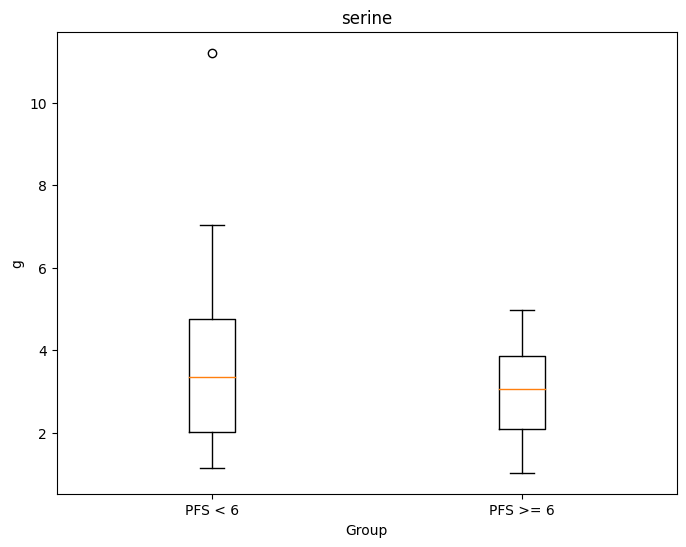

In [80]:

# Step 3: Plotting the boxplot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Create a boxplot
plt.boxplot([serine_0_6, serine_1_6], labels=['PFS < 6', 'PFS >= 6'])

# Set labels and title
plt.xlabel('Group')
plt.ylabel('g')
plt.title('serine')

Text(0.5, 1.0, 'glycine')

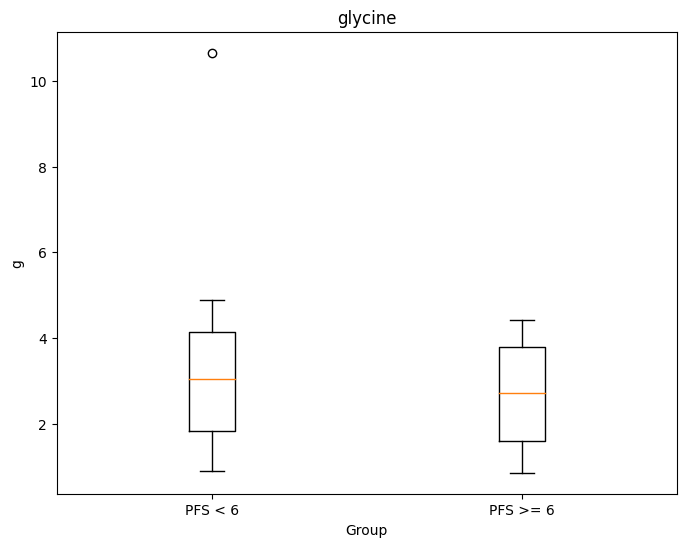

In [81]:
# Step 2: Filter avcarb values based on PFS_3
glycine_0_6 = data[data['PFS_6'] == 0]['glycine']
glycine_1_6 = data[data['PFS_6'] == 1]['glycine']
# Step 3: Plotting the boxplot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Create a boxplot
plt.boxplot([glycine_0_6, glycine_1_6], labels=['PFS < 6', 'PFS >= 6'])

# Set labels and title
plt.xlabel('Group')
plt.ylabel('g')
plt.title('glycine')

Text(0.5, 1.0, 'fol_syn')

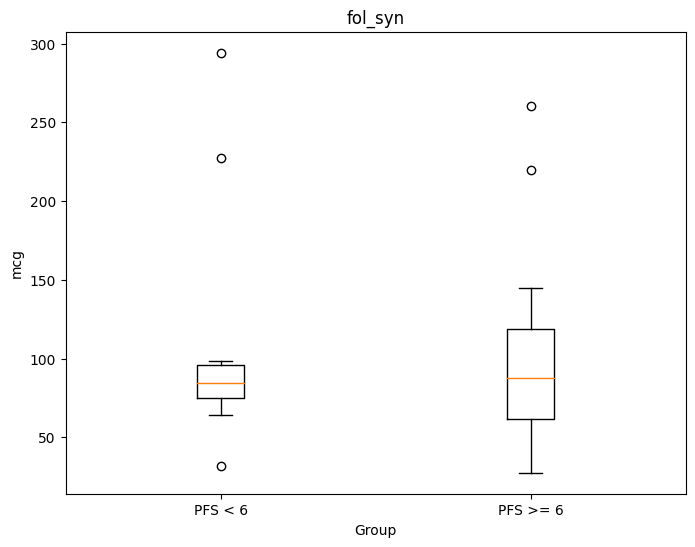

In [82]:
# Step 2: Filter avcarb values based on PFS_3
glycine_0_6 = data[data['PFS_6'] == 0]['fol_syn']
glycine_1_6 = data[data['PFS_6'] == 1]['fol_syn']
# Step 3: Plotting the boxplot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Create a boxplot
plt.boxplot([glycine_0_6, glycine_1_6], labels=['PFS < 6', 'PFS >= 6'])

# Set labels and title
plt.xlabel('Group')
plt.ylabel('mcg')
plt.title('fol_syn')